# 初探神經網路 (邏輯斯迴歸)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示 10 個
# 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)
# 為了顯示的漂亮, 有時候 sklearn 會提示一下 Future Warning
# 我也把關掉了
import warnings
warnings.filterwarnings('ignore')
# 使用 scikit-learn 提供的鳶尾花資料庫
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df = df.drop(["petal width (cm)", "sepal width (cm)"], axis = 1)
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分 (1. 訓練資料 2. 測試資料)
data = df.drop(["target"], axis = 1)
data_train, data_test, target_train, target_test = train_test_split(data,
                                                                    df['target'],
                                                                    test_size=0.1)

In [2]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(data_train, target_train)

In [3]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測　　:", list(predict))
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測: [2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2]
正確標籤: [2, 1, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2]
正確率:  86.66666666666667 %


In [4]:
# 你可以看到我們的 sample 分屬 0, 1, 2 的機率
proba = pd.DataFrame(clf.predict_proba(data_test))
pd.DataFrame(proba)

,0,1,2
0,0.001072,0.362468,0.636460
1,0.065660,0.707203,0.227138
2,0.830006,0.169597,0.000396
3,0.004347,0.421215,0.574438
4,0.090886,0.638035,0.271079
5,0.011123,0.524564,0.464313
6,0.001691,0.379063,0.619245
7,0.828179,0.171339,0.000482
8,0.006604,0.455542,0.537854
9,0.007162,0.443982,0.548855


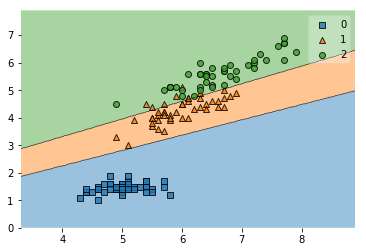

In [5]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
plot_decision_regions(X=np.array(data_train),
y=np.array(target_train),
clf=clf)